<a href="https://colab.research.google.com/github/TristanMons/Ma-512-Final-Project/blob/main/ClimateTextClassification_Legrand_Monsellier_Vinatier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate change Text Classification

In [4]:
import pandas as pd
import json
import urllib.request # Import the urllib.request module

# URL of the JSONL file
url = "https://www.sustainablefinance.uzh.ch/dam/jcr:df02e448-baa1-4db8-921a-58507be4838e/climate-fever-dataset-r1.jsonl"

# Function to read the JSONL file line by line
def read_jsonl_from_url(url):
    data = []
    with urllib.request.urlopen(url) as response:
        for line in response:
            data.append(json.loads(line.decode('utf-8')))
    return data

# Load the data into a pandas DataFrame
df = pd.DataFrame(read_jsonl_from_url(url))

In [5]:
# Display the DataFrame
df.head()

,claim_id,claim,claim_label,evidences
0,0,Global warming is driving polar bears toward e...,SUPPORTS,[{'evidence_id': 'Extinction risk from global ...
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,"[{'evidence_id': 'Famine:386', 'evidence_label..."
2,6,The polar bear population has been growing.,REFUTES,"[{'evidence_id': 'Polar bear:1332', 'evidence_..."
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,"[{'evidence_id': 'Atmosphere of Mars:131', 'ev..."
4,10,Human additions of CO2 are in the margin of er...,REFUTES,[{'evidence_id': 'Carbon dioxide in Earth's at...


In [6]:
print(df.describe())

       claim_id                                              claim  \
count      1535                                               1535   
unique     1535                                               1535   
top           0  Global warming is driving polar bears toward e...   
freq          1                                                  1   

       claim_label                                          evidences  
count         1535                                               1535  
unique           4                                               1534  
top       SUPPORTS  [{'evidence_id': 'Greenland ice sheet:43', 'ev...  
freq           654                                                  2  


In [7]:
print(df.shape)

(1535, 4)


In [8]:
df.value_counts("claim_label")

,count
claim_label,
SUPPORTS,654
NOT_ENOUGH_INFO,474
REFUTES,253
DISPUTED,154


#Start your project here.

In [9]:
df.isnull().count()

,0
claim_id,1535
claim,1535
claim_label,1535
evidences,1535


In [10]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

<Axes: xlabel='claim_label', ylabel='Count'>

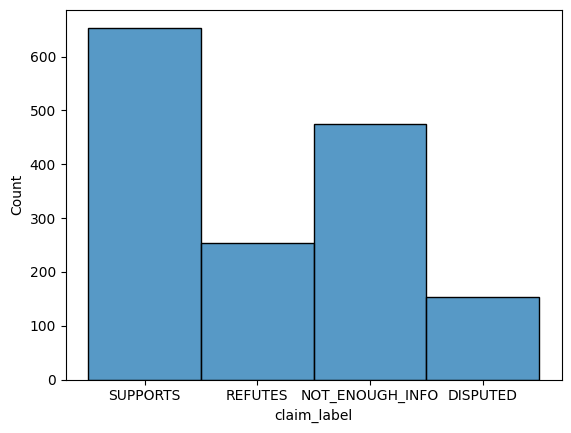

In [11]:
sns.histplot(df["claim_label"])

In [12]:
df = pd.DataFrame(read_jsonl_from_url(url))

## Libraries

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


##Preprocessing

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['claim_stopword'] = df['claim'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["claim_label"])
num_classes = len(le.classes_)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["claim_stopword"]).toarray()
y = to_categorical(df["encoded_label"], num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##1st model

In [16]:
model_1 = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model_1.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##First model evaluation

In [17]:
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.3941 - loss: 0.1819 - val_accuracy: 0.4365 - val_loss: 0.1682
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4124 - loss: 0.1655 - val_accuracy: 0.4202 - val_loss: 0.1650
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.1308 - val_accuracy: 0.4821 - val_loss: 0.1677
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7722 - loss: 0.0737 - val_accuracy: 0.4788 - val_loss: 0.1789
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8680 - loss: 0.0469 - val_accuracy: 0.4886 - val_loss: 0.1835
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.0306 - val_accuracy: 0.4463 - val_loss: 0.1934
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0123 - val_accuracy: 0.4267 - val_loss: 0.2015
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0071 - val_accuracy: 0.4235 - val_los

##Plot results

In [18]:
def plot_model(model_history):
  train_loss  = model_history.history['loss']
  val_loss    = model_history.history['val_loss']

  train_accuracy  = model_history.history['accuracy']
  val_accuracy    = model_history.history['val_accuracy']

  epochs = range(1, len(train_loss) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label='Train')
  plt.plot(epochs, val_loss, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Plot')
  plt.legend()
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_accuracy, label='Train')
  plt.plot(epochs, val_accuracy, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Plot')
  plt.legend()
  plt.grid()

  plt.tight_layout()
  plt.show()

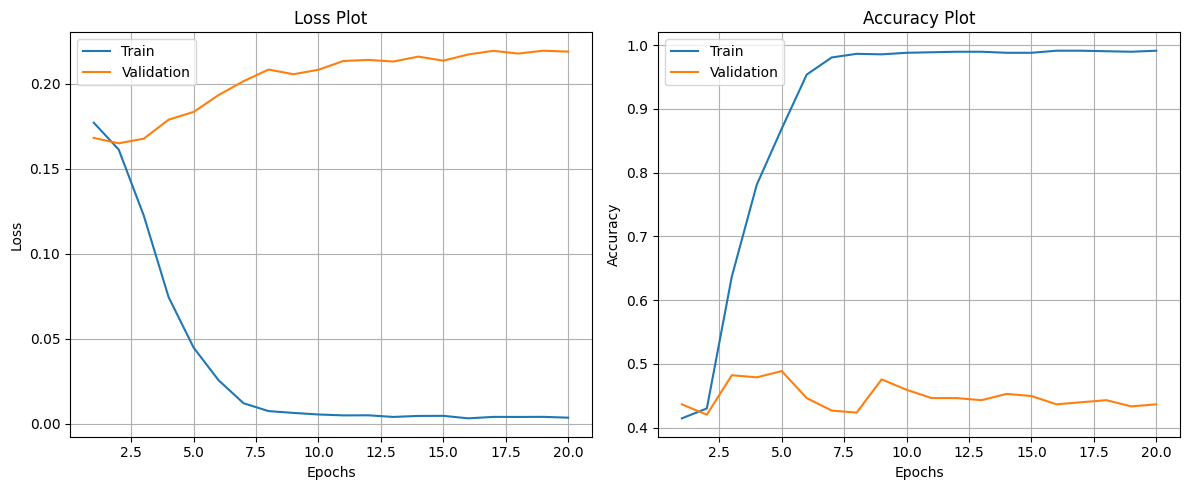

In [19]:

plot_model(history_1)



##2nd model

In [20]:
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Conv1D, Reshape, GlobalMaxPooling1D, Flatten

In [21]:
input_dim = X_train.shape[0]

model_2 = Sequential([
      Conv1D(128, kernel_size=5, kernel_regularizer=L2(1e-12), padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),

      Conv1D(128*2, kernel_size=5, kernel_regularizer=L2(1e-12), padding="same", activation='relu', name="layer2"),
      GlobalMaxPooling1D(),

      Flatten(),
      Dropout(0.5),
      Dense(10, activation='relu'),
      Dropout(0.5),
      Dense(num_classes, activation='softmax')

      ])

model_2.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 516ms/step - accuracy: 0.3455 - loss: 0.1848 - val_accuracy: 0.4365 - val_loss: 0.1758
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.3963 - loss: 0.1834 - val_accuracy: 0.4365 - val_loss: 0.1763
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4273 - loss: 0.1806 - val_accuracy: 0.4365 - val_loss: 0.1768
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.3779 - loss: 0.1807 - val_accuracy: 0.4365 - val_loss: 0.1741
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.4150 - loss: 0.1780 - val_accuracy: 0.4365 - val_loss: 0.1744
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.4108 - loss: 0.1768 - val_accuracy: 0.4365 - val_loss: 0.1732
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.4236 - loss: 0.1750 - val_accuracy: 0.4365 - val_loss: 0.1731
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.3860 - loss: 0.1775 - val_accuracy: 0

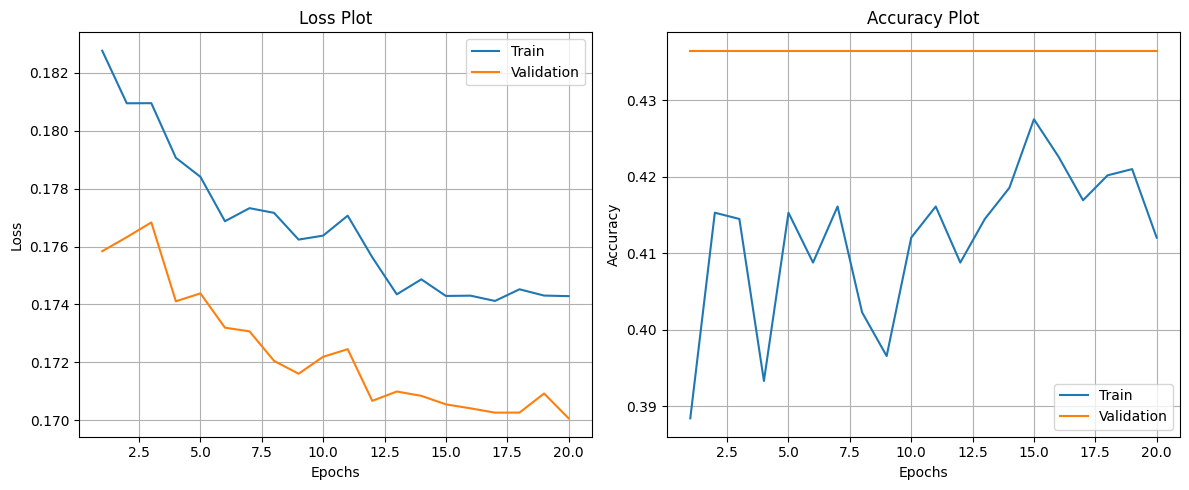

In [23]:
plot_model(history_2)

##Model 3

In [24]:
from tensorflow.keras.layers import MaxPool1D, BatchNormalization

In [25]:
model_3 = Sequential([
    #Conv1D(256, kernel_size=7, kernel_regularizer=L2(1e-12), padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),
    Conv1D(input_dim, kernel_size=7, padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),
    BatchNormalization(),

    GlobalMaxPooling1D(),
    #Flatten(),

    Dense(256, activation="relu", kernel_regularizer=L2(1e-12), name="layer2"),
    Dropout(0.7),
    Dense(128, activation="relu", kernel_regularizer=L2(1e-12), name="layer3"),
    BatchNormalization(),
    Dropout(0.7),
    Dense(num_classes, activation="softmax")
])

model_3.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

In [26]:
history_3 = model_3.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.2191 - loss: 0.3809 - val_accuracy: 0.4365 - val_loss: 0.3632
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.2677 - loss: 0.3646 - val_accuracy: 0.4365 - val_loss: 0.3496
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.3009 - loss: 0.3571 - val_accuracy: 0.4365 - val_loss: 0.3369
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.2892 - loss: 0.3593 - val_accuracy: 0.4365 - val_loss: 0.3231
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3178 - loss: 0.3454 - val_accuracy: 0.4365 - val_loss: 0.3072
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3119 - loss: 0.3482 - val_accuracy: 0.4365 - val_loss: 0.2956
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3234 - loss: 0.3451 - val_accuracy: 0.4365 - val_loss: 0.2900
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.3549 - loss: 0.3265 - val_accuracy: 0.4365 -

In [27]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Conv1D)                      │ (None, 1228, 1228)          │           9,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1228, 1228)          │           4,912 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 1228)                │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 256)                 │         314,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,430 (4.14 MB)

 Trainable params: 360,572 (1.38 MB)

 Non-trainable params: 2,712 (10.59 KB)

 Optimizer params: 721,146 (2.75 MB)

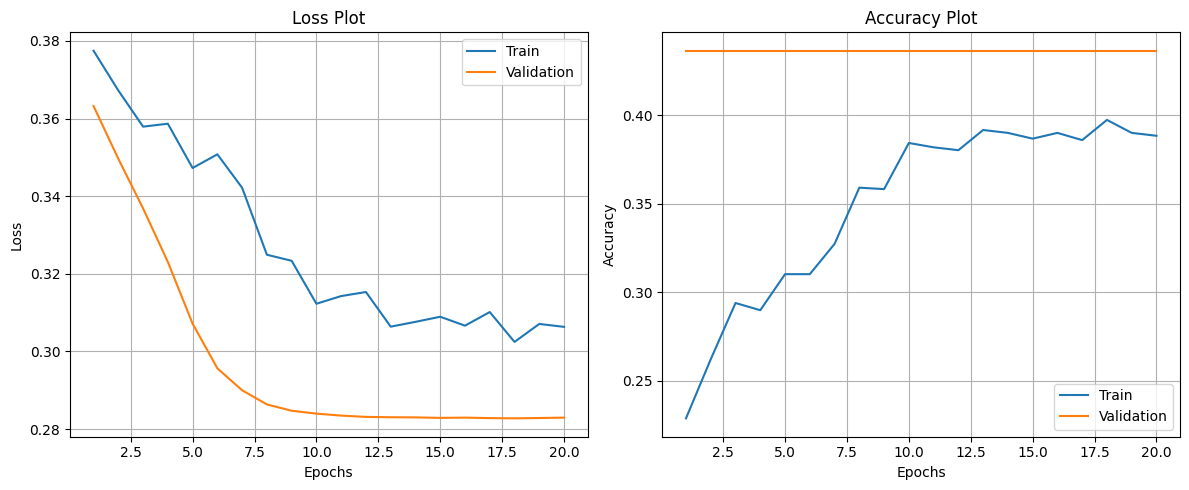

In [28]:
plot_model(history_3)

## Model using Recursive Neural Networl (RNN)

In [29]:
from tensorflow.keras.layers import SimpleRNN

In [30]:
modelRNN_1 = Sequential([

    SimpleRNN(64, input_shape=(X_train.shape[0], 1), activation='relu', name="layer1"),
    Dropout(0.5),

    Dense(32, activation='relu', name="layer2"),
    Dense(num_classes, activation='softmax')
])

modelRNN_1.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_RNN1 = modelRNN_1.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 742ms/step - accuracy: 0.3555 - loss: 0.3740 - val_accuracy: 0.4365 - val_loss: 0.3686
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 515ms/step - accuracy: 0.4170 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 3/20
17/20 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4100 - loss: nan

In [ ]:
plot_model(history_RNN1)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model_RNN2 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[0],1)),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_RNN2.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

In [ ]:
model_RNN2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:

vocab_size = len(tfidf.vocabulary_)
embedding_dim = 100

model_RNN3 = Sequential([
    Embedding(input_dim=(None, vocab_size), output_dim=embedding_dim),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_RNN3.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

In [ ]:
model_RNN2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

### Example pretrained model

-> https://huggingface.co/Sushovan/autotrain-test-text-classification-3175589570

In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")
tokenized_data = tokenizer(df["claim"][0], return_tensors="np", padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data = dict(tokenized_data)

labels = np.array(df["claim_label"])

In [ ]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load and compile our model
model = TFAutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased")
# Lower learning rates are often better for  fine-tuning transformers
model.compile(optimizer=Adam(3e-5))  # No loss argument!

model.fit(tokenized_data, labels)

In [ ]:

under_sampler = RandomUnderSampler(random_state=42)
X_dist, y_dist = under_sampler.fit_resample(np.array(y), np.array(y))

# df_dist = pd.DataFrame({df.columns[0] : X_dist, df.columns[1] : y_dist})
# df_dist.head()

#Comments on the previous section.
This model overfits the training set and performs poorly on the validation set.